In [2]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tickers=["AMZN"]

In [6]:
data=yf.download(tickers,start="2015-01-01")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000
2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500
2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148715600


In [7]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1909 entries, 2015-01-02 to 2022-08-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1909 non-null   float64
 1   High       1909 non-null   float64
 2   Low        1909 non-null   float64
 3   Close      1909 non-null   float64
 4   Adj Close  1909 non-null   float64
 5   Volume     1909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 104.4 KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1.909000e+03
mean,87.064524,88.033981,85.984668,87.026038,87.026038,8.341315e+07
std,50.877086,51.502761,50.174431,50.818584,50.818584,4.210324e+07
min,14.314000,14.539500,14.262500,14.347500,14.347500,1.762600e+07
25%,39.248501,39.587002,38.955002,39.387501,39.387501,5.608600e+07
50%,84.798500,85.471497,83.750000,84.621498,84.621498,7.204200e+07
75%,130.060501,131.074005,126.250000,128.634003,128.634003,9.767940e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


In [10]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
new_stock_data=data[["Close"]]
new_stock_data

,Close
Date,
2015-01-02,15.426000
2015-01-05,15.109500
2015-01-06,14.764500
2015-01-07,14.921000
2015-01-08,15.023000
...,...
2022-07-27,120.970001
2022-07-28,122.279999
2022-07-29,134.949997


In [12]:
series=new_stock_data.reset_index()
series

,Date,Close
0,2015-01-02,15.426000
1,2015-01-05,15.109500
2,2015-01-06,14.764500
3,2015-01-07,14.921000
4,2015-01-08,15.023000
...,...,...
1904,2022-07-27,120.970001
1905,2022-07-28,122.279999
1906,2022-07-29,134.949997
1907,2022-08-01,135.389999


In [13]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


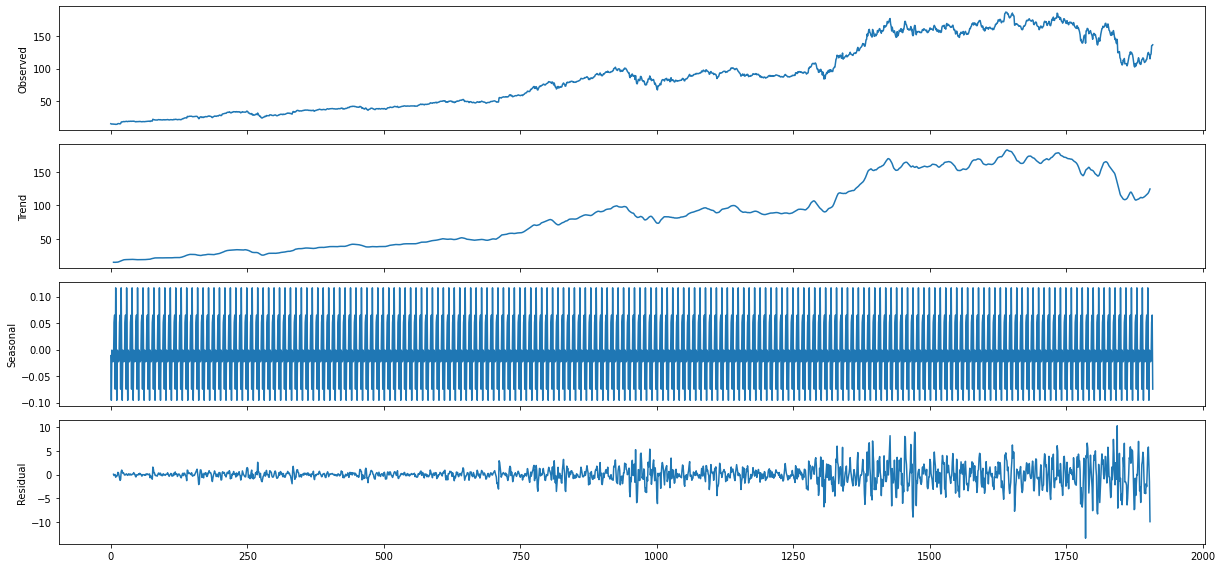

In [14]:
rcParams['figure.figsize'] = 17,8
decomposition =seasonal_decompose(series.Close,freq=10)
fig = decomposition.plot()
plt.show()

In [15]:
import plotly.express as px
import plotly.graph_objs as go

In [16]:
fig = px.line(x=series.Date,y=series.Close,labels={"x":"Date","y":"Closing price"})
fig.show()

In [17]:
fig = px.line(x=series.Date,y=series.Close,labels={"x":"Date","y":"Closing price"})
fig.show()

In [18]:
fig=px.bar(series,x=series.Date,y="Close")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



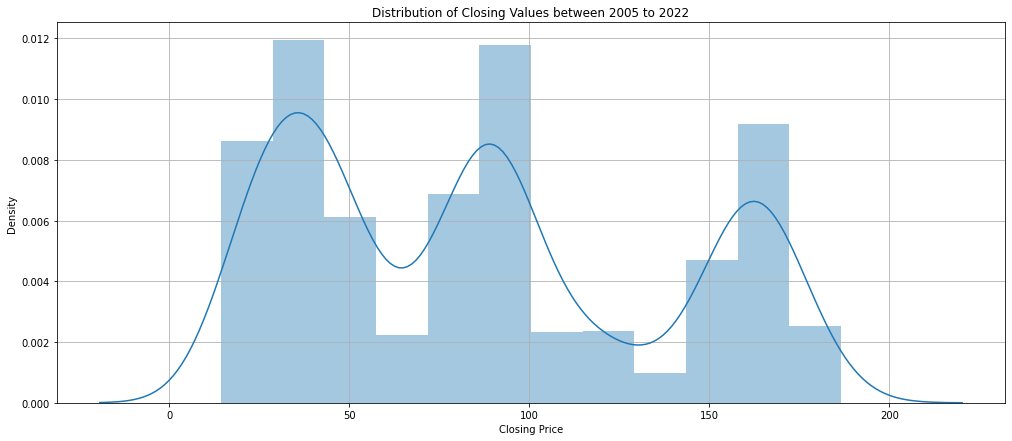

In [19]:
plt.figure(figsize=(17,7))
sns.distplot(series.Close)
plt.title("Distribution of Closing Values between 2005 to 2022")
plt.xlabel("Closing Price")
plt.grid(True)
plt.show()

In [21]:
from pandas.plotting import lag_plot

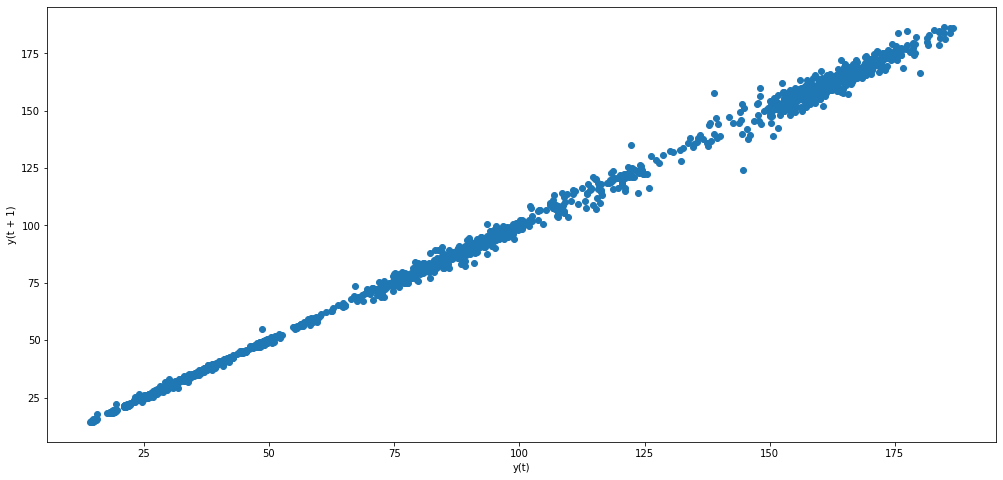

In [22]:
lag_plot(series.Close)

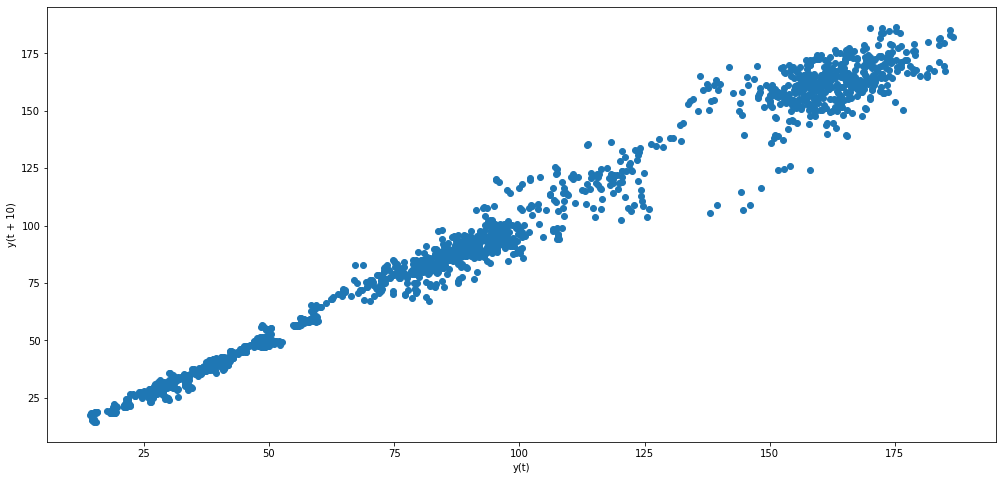

In [23]:
lag_plot(series.Close,lag=10)

In [24]:
series.shape

(1909, 2)

In [25]:
series

,Date,Close
0,2015-01-02,15.426000
1,2015-01-05,15.109500
2,2015-01-06,14.764500
3,2015-01-07,14.921000
4,2015-01-08,15.023000
...,...,...
1904,2022-07-27,120.970001
1905,2022-07-28,122.279999
1906,2022-07-29,134.949997
1907,2022-08-01,135.389999


In [26]:
(20/100)*len(series),(80/100)*len(series)

(381.8, 1527.2)

In [27]:
y=np.round((20/100)*len(series),0)
y=int(y)
y

382

In [28]:
x=np.round((80/100)*len(series),0)
x=int(x)
x

1527

In [29]:
train=series.head(x)
test=series.tail(y)
train.shape,test.shape

((1527, 2), (382, 2))

In [31]:
train.head()

,Date,Close
0,2015-01-02,15.4260
1,2015-01-05,15.1095
2,2015-01-06,14.7645
3,2015-01-07,14.9210
4,2015-01-08,15.0230


In [32]:
test.head()

,Date,Close
1527,2021-01-27,161.628998
1528,2021-01-28,161.880997
1529,2021-01-29,160.309998
1530,2021-02-01,167.143997
1531,2021-02-02,169.000000


In [33]:
def RMSE(actual,pred):
    temp=np.sqrt(np.mean((actual-pred)**2))
    return temp
def MAPE(pred,actual):
    temp=np.mean(np.abs((pred-actual)/actual)*100)
    return temp

In [34]:
moving_avg_20=series.Close.rolling(20).mean()     # mean of first 20 values and put it in 21 th observation and so on..
moving_avg_20[20]

15.277249908447265

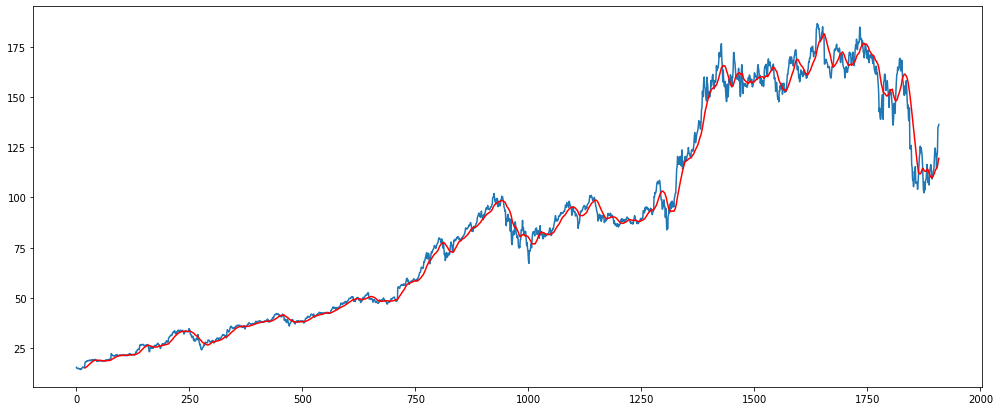

In [35]:
plt.figure(figsize=(17,7))
plt.plot(series.Close)
plt.plot(moving_avg_20,color="red")
plt.show()

In [36]:
train.shape,test.shape

((1527, 2), (382, 2))

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(series[["Close"]].values)
scaled_train=scaler.fit_transform(train[["Close"]].values)
scaled_test=scaler.fit_transform(test[["Close"]].values)
scaled_train

array([[0.00664817],
       [0.00469718],
       [0.0025705 ],
       ...,
       [0.92626908],
       [0.92681462],
       [0.93671757]])

In [39]:
len(scaled_train),len(scaled_test),len(scaled_data),scaled_data.shape

(1527, 382, 1909, (1909, 1))

In [40]:
x_train=[]
y_train=[]

for i in range(20,len(scaled_train)):
  x_train.append(scaled_train[i-20:i])
  y_train.append(scaled_train[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [41]:
x_train

array([[[0.00664817],
        [0.00469718],
        [0.0025705 ],
        ...,
        [0.00522731],
        [0.00765295],
        [0.02082909]],

       [[0.00469718],
        [0.0025705 ],
        [0.00353521],
        ...,
        [0.00765295],
        [0.02082909],
        [0.02389274]],

       [[0.0025705 ],
        [0.00353521],
        [0.00416397],
        ...,
        [0.02082909],
        [0.02389274],
        [0.02360919]],

       ...,

       [[0.89985211],
        [0.89330257],
        [0.88942525],
        ...,
        [0.87341963],
        [0.91737717],
        [0.93081836]],

       [[0.89330257],
        [0.88942525],
        [0.92372016],
        ...,
        [0.91737717],
        [0.93081836],
        [0.92626908]],

       [[0.88942525],
        [0.92372016],
        [0.93544467],
        ...,
        [0.93081836],
        [0.92626908],
        [0.92681462]]])

In [43]:
x_train.shape ,len(x_train)

((1507, 20, 1), 1507)

In [44]:
y_train.shape, len(x_train)

((1507,), 1507)

In [45]:
# MODEL BUILDING

In [46]:
import tensorflow 
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [47]:
# units = Time steps
model = Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))  
model.add(Dropout(0.1))
model.add(LSTM(units=60,activation="relu",return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation="relu",return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(units=120,activation="relu"))  
model.add(Dropout(0.4))
model.add(Dense(units=1))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 20, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [49]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
48/48 [==============================] - 10s 71ms/step - loss: 0.0409
Epoch 2/100
48/48 [==============================] - 4s 88ms/step - loss: 0.0055
Epoch 3/100
48/48 [==============================] - 4s 81ms/step - loss: 0.0050
Epoch 4/100
48/48 [==============================] - 4s 81ms/step - loss: 0.0041
Epoch 5/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0055
Epoch 6/100
48/48 [==============================] - 5s 101ms/step - loss: 0.0035
Epoch 7/100
48/48 [==============================] - 4s 89ms/step - loss: 0.0032
Epoch 8/100
48/48 [==============================] - 5s 94ms/step - loss: 0.0035
Epoch 9/100
48/48 [==============================] - 5s 108ms/step - loss: 0.0029
Epoch 10/100
48/48 [==============================] - 5s 105ms/step - loss: 0.0031
Epoch 11/100
48/48 [==============================] - 4s 89ms/step - loss: 0.0032
Epoch 12/100
48/48 [==============================] - 3s 64ms/step - loss: 0.0034
Epoch 13/100
48/48 [=

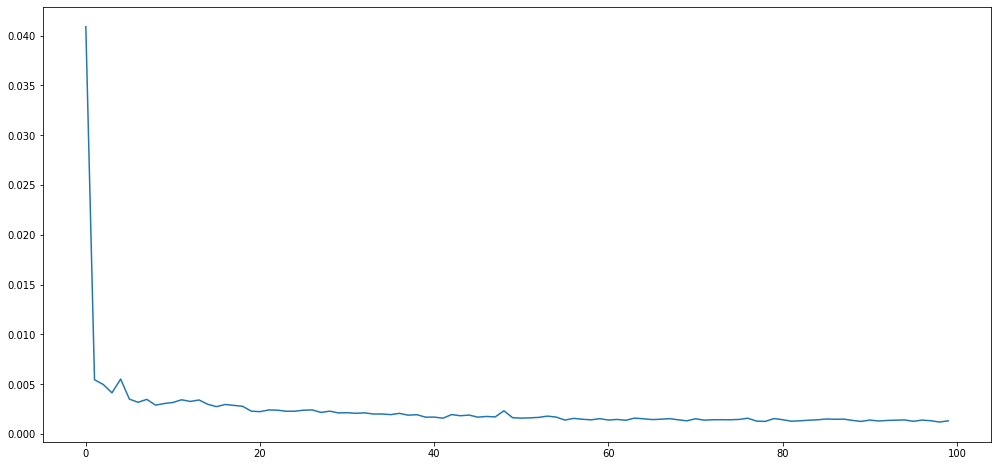

In [50]:
loss=model.history.history["loss"]
plt.plot(loss)


In [51]:
model.save("LSTM_MODEL")

In [52]:
# Testing

In [53]:
test.head()

,Date,Close
1527,2021-01-27,161.628998
1528,2021-01-28,161.880997
1529,2021-01-29,160.309998
1530,2021-02-01,167.143997
1531,2021-02-02,169.000000


In [54]:
train.tail(20)

,Date,Close
1507,2020-12-28,164.197998
1508,2020-12-29,166.100006
1509,2020-12-30,164.292496
1510,2020-12-31,162.846497
1511,2021-01-04,159.331497
1512,2021-01-05,160.925507
1513,2021-01-06,156.919006
1514,2021-01-07,158.108002
1515,2021-01-08,159.134995
1516,2021-01-11,155.710495


In [55]:
past_20_train_values=train[["Close"]].tail(20)

In [56]:
final_df=past_20_train_values.append(test,ignore_index=True)
final_df

,Close,Date
0,164.197998,NaT
1,166.100006,NaT
2,164.292496,NaT
3,162.846497,NaT
4,159.331497,NaT
...,...,...
397,120.970001,2022-07-27
398,122.279999,2022-07-28
399,134.949997,2022-07-29
400,135.389999,2022-08-01


In [57]:
scaled_final_test_data=scaler.fit_transform(final_df[["Close"]])
scaled_final_test_data

array([[0.73448415],
       [0.7570571 ],
       [0.73560565],
       [0.71844459],
       [0.67672873],
       [0.69564636],
       [0.64809739],
       [0.66220834],
       [0.67439664],
       [0.63375483],
       [0.63768323],
       [0.66442163],
       [0.6416234 ],
       [0.62784457],
       [0.63764158],
       [0.72227212],
       [0.74815016],
       [0.73939153],
       [0.74044185],
       [0.7595078 ],
       [0.70399537],
       [0.70698608],
       [0.68834153],
       [0.76944714],
       [0.79147411],
       [0.7514375 ],
       [0.76239765],
       [0.77494795],
       [0.75761486],
       [0.74696927],
       [0.73603882],
       [0.72153038],
       [0.73077542],
       [0.72557721],
       [0.74912932],
       [0.76075389],
       [0.71427299],
       [0.67323368],
       [0.68139887],
       [0.6606477 ],
       [0.59990156],
       [0.62112738],
       [0.65270216],
       [0.62207683],
       [0.56894991],
       [0.55267293],
       [0.56625582],
       [0.537

In [58]:
len(scaled_final_test_data),scaled_final_test_data.shape

(402, (402, 1))

In [59]:
x_test=[]
y_test=[]

for i in range(20,len(scaled_final_test_data)):
  x_test.append(scaled_final_test_data[i-20:i])
  y_test.append(scaled_final_test_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [60]:
x_test.shape,y_test.shape

((382, 20, 1), (382,))

In [61]:
# Predictions

In [62]:
y_pred_test=model.predict(x_test)
y_pred_test

array([[0.73063207],
       [0.7427911 ],
       [0.75397766],
       [0.7616534 ],
       [0.76824796],
       [0.77523994],
       [0.7821734 ],
       [0.78981245],
       [0.79757965],
       [0.80482394],
       [0.81105745],
       [0.8155643 ],
       [0.81777394],
       [0.8181896 ],
       [0.8171785 ],
       [0.81546247],
       [0.81364405],
       [0.81213593],
       [0.80958366],
       [0.8052011 ],
       [0.7990296 ],
       [0.7893827 ],
       [0.7762352 ],
       [0.760679  ],
       [0.7439821 ],
       [0.726604  ],
       [0.7073786 ],
       [0.68613803],
       [0.66331017],
       [0.6427733 ],
       [0.62675536],
       [0.616874  ],
       [0.61286366],
       [0.61341155],
       [0.61664903],
       [0.6222085 ],
       [0.6275052 ],
       [0.63125   ],
       [0.63377357],
       [0.6364995 ],
       [0.63892764],
       [0.63999057],
       [0.63894796],
       [0.6365143 ],
       [0.63325566],
       [0.63079786],
       [0.63084286],
       [0.635

In [63]:
y_pred_test_df=pd.DataFrame(y_pred_test,columns=["y_pred_test"])
y_pred_test_df

,y_pred_test
0,0.730632
1,0.742791
2,0.753978
3,0.761653
4,0.768248
...,...
377,0.172619
378,0.180960
379,0.189301
380,0.198951


In [64]:
original_y_pred_test=scaler.inverse_transform(y_pred_test_df)
original_y_pred_test

array([[163.87343 ],
       [164.89795 ],
       [165.84053 ],
       [166.4873  ],
       [167.04295 ],
       [167.63211 ],
       [168.21632 ],
       [168.85999 ],
       [169.51445 ],
       [170.12486 ],
       [170.6501  ],
       [171.02985 ],
       [171.21603 ],
       [171.25107 ],
       [171.16586 ],
       [171.02127 ],
       [170.86804 ],
       [170.74098 ],
       [170.52592 ],
       [170.15665 ],
       [169.63663 ],
       [168.82378 ],
       [167.71597 ],
       [166.4052  ],
       [164.9983  ],
       [163.53401 ],
       [161.91408 ],
       [160.12433 ],
       [158.20085 ],
       [156.4704  ],
       [155.12073 ],
       [154.28812 ],
       [153.9502  ],
       [153.99637 ],
       [154.26915 ],
       [154.7376  ],
       [155.1839  ],
       [155.49945 ],
       [155.71208 ],
       [155.94177 ],
       [156.14636 ],
       [156.23593 ],
       [156.14807 ],
       [155.94301 ],
       [155.66844 ],
       [155.46135 ],
       [155.46513 ],
       [155.8

In [65]:
y_pred_test.shape

(382, 1)

In [66]:
y_pred_test

array([[0.73063207],
       [0.7427911 ],
       [0.75397766],
       [0.7616534 ],
       [0.76824796],
       [0.77523994],
       [0.7821734 ],
       [0.78981245],
       [0.79757965],
       [0.80482394],
       [0.81105745],
       [0.8155643 ],
       [0.81777394],
       [0.8181896 ],
       [0.8171785 ],
       [0.81546247],
       [0.81364405],
       [0.81213593],
       [0.80958366],
       [0.8052011 ],
       [0.7990296 ],
       [0.7893827 ],
       [0.7762352 ],
       [0.760679  ],
       [0.7439821 ],
       [0.726604  ],
       [0.7073786 ],
       [0.68613803],
       [0.66331017],
       [0.6427733 ],
       [0.62675536],
       [0.616874  ],
       [0.61286366],
       [0.61341155],
       [0.61664903],
       [0.6222085 ],
       [0.6275052 ],
       [0.63125   ],
       [0.63377357],
       [0.6364995 ],
       [0.63892764],
       [0.63999057],
       [0.63894796],
       [0.6365143 ],
       [0.63325566],
       [0.63079786],
       [0.63084286],
       [0.635

In [67]:
original_y_test_df=pd.DataFrame(y_test,columns=["y_test"])
original_y_test_df

,y_test
0,0.703995
1,0.706986
2,0.688342
3,0.769447
4,0.791474
...,...
377,0.221456
378,0.237003
379,0.387370
380,0.392592


In [68]:
original_y_test=scaler.inverse_transform(original_y_test_df)
original_y_test

array([[161.6289978 ],
       [161.8809967 ],
       [160.30999756],
       [167.14399719],
       [169.        ],
       [165.62649536],
       [166.55000305],
       [167.60749817],
       [166.14700317],
       [165.25      ],
       [164.32899475],
       [163.10650635],
       [163.88549805],
       [163.44749451],
       [165.43200684],
       [166.41149902],
       [162.49499512],
       [159.03700256],
       [159.7250061 ],
       [157.97650146],
       [152.85800171],
       [154.64649963],
       [157.30700684],
       [154.72650146],
       [150.25      ],
       [148.87849426],
       [150.022995  ],
       [147.59750366],
       [153.14250183],
       [152.88200378],
       [155.67950439],
       [154.47450256],
       [154.08399963],
       [154.59300232],
       [156.78649902],
       [151.39950562],
       [153.7480011 ],
       [155.54350281],
       [156.875     ],
       [154.35350037],
       [152.31300354],
       [152.60150146],
       [153.78649902],
       [152

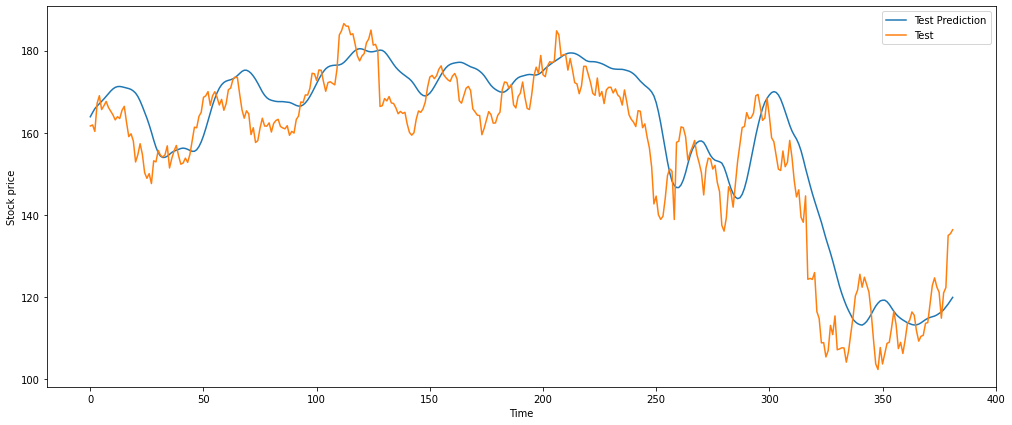

In [69]:
plt.figure(figsize=(17,7))
plt.plot(original_y_pred_test,label="Test Prediction")
plt.plot(original_y_test,label="Test")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [70]:
y_pred_test_df=pd.DataFrame(original_y_pred_test,columns=["Test_Predictions"],index=test.index)
y_pred_test_df

,Test_Predictions
1527,163.873428
1528,164.897949
1529,165.840530
1530,166.487305
1531,167.042953
...,...
1904,116.855003
1905,117.557800
1906,118.260559
1907,119.073685


In [71]:
test_df=pd.DataFrame(original_y_test,columns=["Test_values"],index=test.index)
test_df

,Test_values
1527,161.628998
1528,161.880997
1529,160.309998
1530,167.143997
1531,169.000000
...,...
1904,120.970001
1905,122.279999
1906,134.949997
1907,135.389999


In [72]:
final_test_df=test_df.join(y_pred_test_df)
final_test_df

,Test_values,Test_Predictions
1527,161.628998,163.873428
1528,161.880997,164.897949
1529,160.309998,165.840530
1530,167.143997,166.487305
1531,169.000000,167.042953
...,...,...
1904,120.970001,116.855003
1905,122.279999,117.557800
1906,134.949997,118.260559
1907,135.389999,119.073685


In [73]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 1527 to 1908
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Test_values       382 non-null    float64
 1   Test_Predictions  382 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 4.6 KB


In [74]:
fig=px.line(final_test_df,x=final_test_df.index,y=final_test_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [75]:
RMSE=RMSE(final_test_df.Test_values,final_test_df.Test_Predictions)
RMSE

9.224512867125688

In [76]:
MAPE=MAPE (final_test_df.Test_values,final_test_df.Test_Predictions)
MAPE

4.667528442257891

In [77]:
# Appying model on whole datase

In [78]:
scaled_data

array([[0.00626223],
       [0.0044245 ],
       [0.00242128],
       ...,
       [0.70026942],
       [0.70282426],
       [0.70842744]])

In [79]:
X=[]
Y=[]

for i in range(20,len(scaled_data)):
  X.append(scaled_data[i-20:i])
  Y.append(scaled_data[i,0])

X,Y=np.array(X),np.array(Y)

In [80]:
X.shape,Y.shape,scaled_data.shape

((1889, 20, 1), (1889,), (1909, 1))

In [81]:
y_pred=model.predict(X)
y_pred

array([[0.06634678],
       [0.06651168],
       [0.06683108],
       ...,
       [0.62946737],
       [0.63472736],
       [0.6428594 ]], dtype=float32)

In [82]:
y_pred.shape

(1889, 1)

In [83]:
Y

array([0.0225057 , 0.02223861, 0.02258699, ..., 0.70026942, 0.70282426,
       0.70842744])

In [84]:
y_df=pd.DataFrame(Y,columns=["Close"])
y_df.head(2)

,Close
0,0.022506
1,0.022239


In [85]:
Actual_y=scaler.inverse_transform(y_df)
Actual_y

array([[104.20633923],
       [104.18383386],
       [104.21318874],
       ...,
       [161.31504753],
       [161.53031974],
       [162.00244643]])

In [86]:
y_pred_df=pd.DataFrame(y_pred,columns=["Predicted_y"])
y_pred_df

,Predicted_y
0,0.066347
1,0.066512
2,0.066831
3,0.067310
4,0.067880
...,...
1884,0.619396
1885,0.625359
1886,0.629467
1887,0.634727


In [87]:
predicted_y=scaler.inverse_transform(y_pred_df)
predicted_y

array([[107.90041 ],
       [107.91431 ],
       [107.941216],
       ...,
       [155.34924 ],
       [155.79245 ],
       [156.47765 ]], dtype=float32)

In [88]:
s=series[20:]
s

,Date,Close
20,2015-02-02,18.223499
21,2015-02-03,18.177500
22,2015-02-04,18.237499
23,2015-02-05,18.694500
24,2015-02-06,18.714001
...,...,...
1904,2022-07-27,120.970001
1905,2022-07-28,122.279999
1906,2022-07-29,134.949997
1907,2022-08-01,135.389999


In [89]:
y_pred_df=pd.DataFrame(predicted_y,columns=["Predictions"])
y_pred_df

,Predictions
0,107.900414
1,107.914307
2,107.941216
3,107.981575
4,108.029610
...,...
1884,154.500641
1885,155.003052
1886,155.349243
1887,155.792450


In [90]:
Y_df=pd.DataFrame(Actual_y,columns=["Actual"])
Y_df

,Actual
0,104.206339
1,104.183834
2,104.213189
3,104.436777
4,104.446318
...,...
1884,154.475302
1885,155.116222
1886,161.315048
1887,161.530320


In [91]:
final_prediction_df=Y_df.join(y_pred_df)
final_prediction_df

,Actual,Predictions
0,104.206339,107.900414
1,104.183834,107.914307
2,104.213189,107.941216
3,104.436777,107.981575
4,104.446318,108.029610
...,...,...
1884,154.475302,154.500641
1885,155.116222,155.003052
1886,161.315048,155.349243
1887,161.530320,155.792450


In [92]:
fig=px.line(final_prediction_df,x=final_prediction_df.index,y=final_prediction_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [93]:
import pickle

In [94]:
filename="LSTM_trained_model.sav"
pickle.dump(model,open(filename,"wb"))